# **EDA**

In [3]:
import pandas as pd
#pandas
import numpy as np
#numpy
import matplotlib.pyplot as plt
#matplotlib
import seaborn as sns
#seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
#sklearn
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
#from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam
#keras
import tensorflow as tf
#tensorflow
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk
import os
import nltk # For NLP
import re # For Regex 
import string # For punctuation
#other useful stuff
from wordcloud import WordCloud, STOPWORDS
#wordclouds and cloud stopwords
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rizky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
df1 = "https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/Twitter_Emotion_Dataset.csv"
df1 = pd.read_csv(df1, lineterminator="\n")
df1 = df1[['tweet','label']].rename(columns={'tweet':'Tweet'})
df1

,Tweet,label
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",anger
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",anger
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,happy
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",anger
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",happy
...,...,...
4396,"Tahukah kamu, bahwa saat itu papa memejamkan m...",love
4397,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,fear
4398,"5. masa depannya nggak jelas. lha iya, gimana ...",anger
4399,[USERNAME] dulu beneran ada mahasiswa Teknik U...,happy


# **Exploratory data analysis**

In [65]:
# Mendefinisikan mapping dari emosi ke sentimen
emotion_to_sentiment = {
    'happy': 'positive',
    'love': 'positive',
    'anger': 'negative',
    'sadness': 'negative',
    'fear': 'negative'
}
# Mengubah label emosi menjadi label sentimen
df1['label'] = df1['label'].map(emotion_to_sentiment)
df1

,Tweet,label
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",negative
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",negative
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,positive
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",negative
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",positive
...,...,...
4396,"Tahukah kamu, bahwa saat itu papa memejamkan m...",positive
4397,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,negative
4398,"5. masa depannya nggak jelas. lha iya, gimana ...",negative
4399,[USERNAME] dulu beneran ada mahasiswa Teknik U...,positive


### **Renaming column names**


Because of the numerical column names, it will be more convenient to work with a dataset with predefined column names.

In [66]:
df2 = pd.read_csv("https://raw.githubusercontent.com/rizky-22017-mhs-unesa-ac-id/Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X/main/Dataset/INA_TweetsPPKM_Labeled_Pure.csv", sep="\t")
df2.drop(columns=["Date", "User"], inplace=True)
df2.rename(columns={"sentiment": "label"}, inplace=True)
df2

,Tweet,label
0,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,Kementerian Agama menerbitkan Surat Edaran Nom...,1
...,...,...
23639,noelle loses a bet to akarsha and it somehow e...,1
23640,they call her... weekeeshee...\n#butterflysoup...,1
23641,"put out what you wanna see more of, amirite ga...",1
23642,"i don't need anybody, i'm fine here on my own\...",1


In [67]:
# Menghitung jumlah baris untuk setiap label
label_counts = df2['label'].value_counts()
# Mengambil 70% dari baris dengan label 'neutral'
neutral_rows = df2[df2['label'] == 1]
reduced_neutral_rows = neutral_rows.sample(n=int(len(neutral_rows)*0.3), random_state=1)
# Mengambil semua baris dengan label selain 'neutral'
other_rows = df2[df2['label'] != 1]
# Menggabungkan baris yang telah direduksi dengan baris lainnya
df2 = pd.concat([other_rows, reduced_neutral_rows])
df2

,Tweet,label
33,Karena stimulasi untuk #anakberkebutuhankhusus...,2
35,Hadir Kembali Boss!! MEGA WIN Dari https://t.c...,0
44,Hayolohhhhhhhhh... seneng kannnn??\n\n#covid19...,0
47,Thank You teman-teman dari #saganheritagehotel...,0
51,Ruwet Ruwet Ruwet inilah Negeri RuwetNesia. He...,0
...,...,...
5643,Satpol PP Sidak Pelaksanaan Sekolah Tatap Muka...,1
17877,Perlakuan Petugas PPKM Darurat ke Paspamres Da...,1
12817,Jadi di perpanjang atau stop sampai hari ini s...,1
4932,Polres Kepulauan Seribu Terus bagikan masker d...,1


In [68]:
number_to_sentiment = {
    0: 'positive',
    1: 'neutral',
    2: 'negative'
}
df2['label'] = df2['label'].map(number_to_sentiment)
df2

,Tweet,label
33,Karena stimulasi untuk #anakberkebutuhankhusus...,negative
35,Hadir Kembali Boss!! MEGA WIN Dari https://t.c...,positive
44,Hayolohhhhhhhhh... seneng kannnn??\n\n#covid19...,positive
47,Thank You teman-teman dari #saganheritagehotel...,positive
51,Ruwet Ruwet Ruwet inilah Negeri RuwetNesia. He...,positive
...,...,...
5643,Satpol PP Sidak Pelaksanaan Sekolah Tatap Muka...,neutral
17877,Perlakuan Petugas PPKM Darurat ke Paspamres Da...,neutral
12817,Jadi di perpanjang atau stop sampai hari ini s...,neutral
4932,Polres Kepulauan Seribu Terus bagikan masker d...,neutral


In [69]:
df = pd.concat([df1, df2], ignore_index=True)

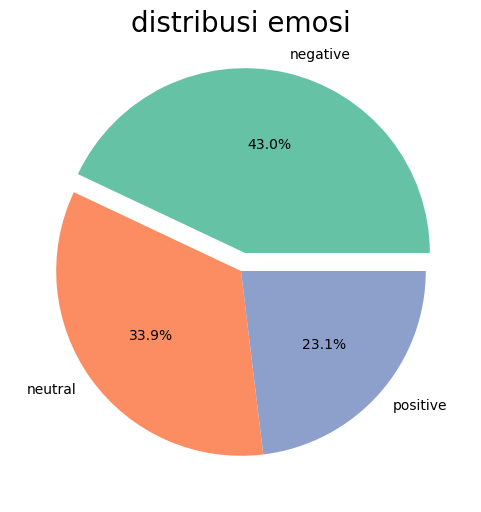

In [70]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['label'].value_counts()]
labels = list(df['label'].value_counts().index)
explode = (0.1, 0, 0)  # Offset the first segment
# Gunakan palet warna Seaborn
colors = sns.color_palette('Set2')
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors, textprops={'fontsize': 10})
ax.set_title('distribusi emosi', fontsize = 20)
plt.show()

In [12]:
df1['length'] = df1.Tweet.str.split().apply(len)

Adding new column to dataset with length of particular tweets.

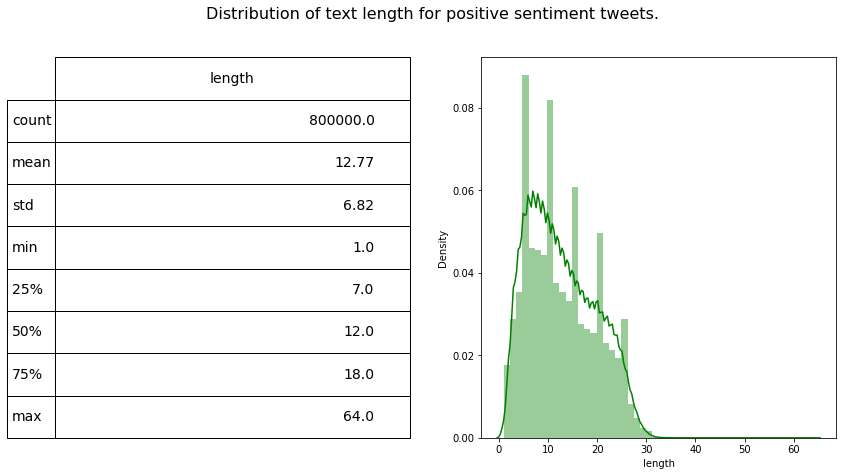

In [16]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(data[data['target']=='Positive']['length'], ax=ax1,color='green')
describe = data.length[data.target=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

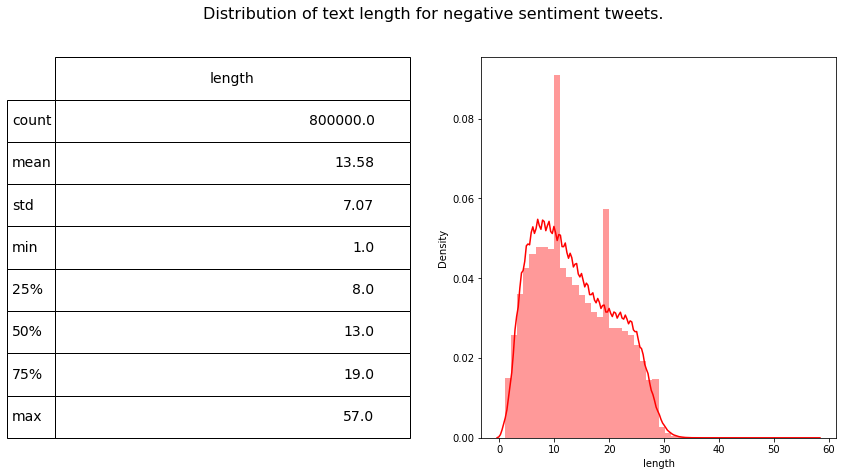

In [17]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(data[data['target']=='Negative']['length'], ax=ax1,color='red')
describe = data.length[data.target=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)

plt.show()

In such a large dataset, tweets belonging to two classes are almost the same lengths. However, the average tweet length for the negative class is about 0.8 words longer.

### **Most commonly tweeting users**

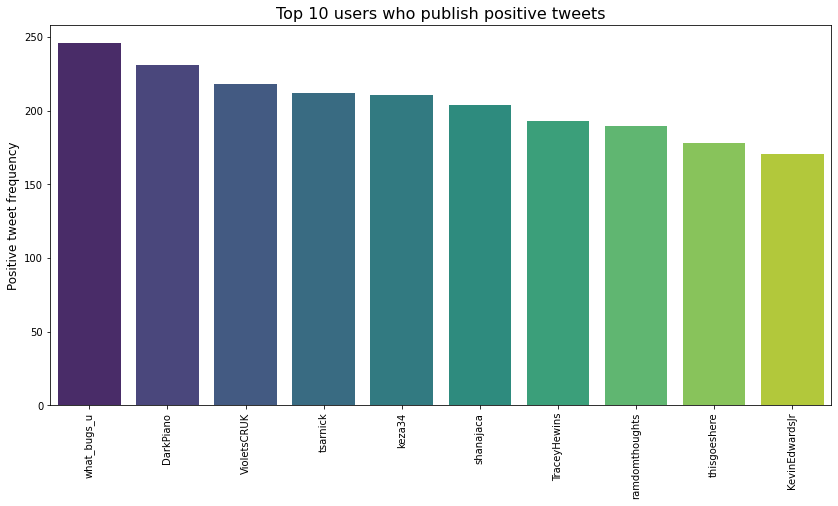

In [18]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=data[data['target']=='Positive']['username'].value_counts()[:10].index, \
                           y=data[data['target']=='Positive']['username'].value_counts()[:10],palette='viridis')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Positive tweet frequency',fontsize=12)
plt.title('Top 10 users who publish positive tweets',fontsize=16)
plt.show()

Seems like what_bugs_u is kind of a user who is in good mood really often.

In [19]:
data[data['username']=='what_bugs_u'].head()

,target,id,date,query,username,content,length
1141441,Positive,1977182027,Sat May 30 20:18:46 PDT 2009,NO_QUERY,what_bugs_u,"@JadeMcCray why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",22
1141626,Positive,1977198277,Sat May 30 20:21:22 PDT 2009,NO_QUERY,what_bugs_u,"@cadmiumcannibal why limit your story to 140 ch. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",22
1141648,Positive,1977207353,Sat May 30 20:22:52 PDT 2009,NO_QUERY,what_bugs_u,"@RonanDosSantos why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",22
1141674,Positive,1977208245,Sat May 30 20:23:01 PDT 2009,NO_QUERY,what_bugs_u,"@ShayMac28 why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",22
1142667,Positive,1977331498,Sat May 30 20:43:12 PDT 2009,NO_QUERY,what_bugs_u,"@lynnsdecor why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",22


Based on the contet posted by the user, it can be concluded that this is not a regular user but it is just a bot.

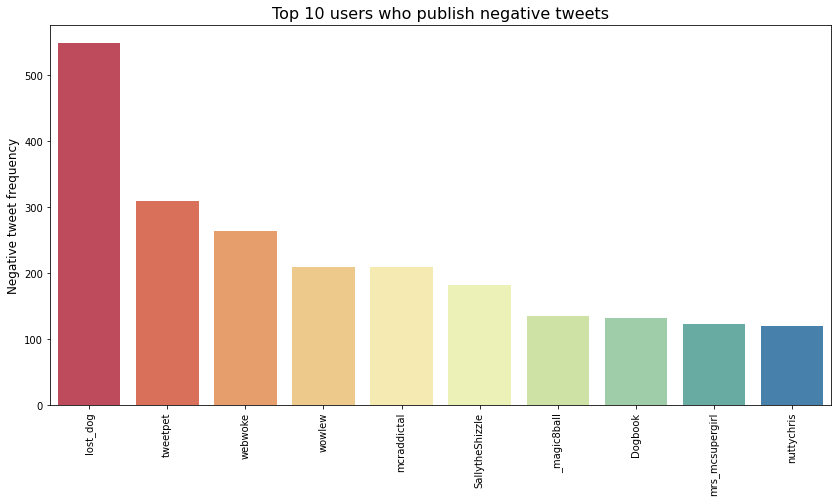

In [20]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=data[data['target']=='Negative']['username'].value_counts()[:10].index, \
                           y=data[data['target']=='Negative']['username'].value_counts()[:10],palette='Spectral')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Negative tweet frequency',fontsize=12)
plt.title('Top 10 users who publish negative tweets',fontsize=16)
plt.show()

In [21]:
data[data['username']=='lost_dog'].head()

,target,id,date,query,username,content,length
43935,Negative,1676704158,Fri May 01 22:54:02 PDT 2009,NO_QUERY,lost_dog,@NyleW I am lost. Please help me find a good home.,11
45574,Negative,1677189389,Sat May 02 00:51:35 PDT 2009,NO_QUERY,lost_dog,@SallyD I am lost. Please help me find a good home.,11
46919,Negative,1677519173,Sat May 02 02:30:50 PDT 2009,NO_QUERY,lost_dog,@zuppaholic I am lost. Please help me find a good home.,11
47949,Negative,1677752995,Sat May 02 03:47:51 PDT 2009,NO_QUERY,lost_dog,@LOSTPETUSA I am lost. Please help me find a good home.,11
50572,Negative,1678544903,Sat May 02 07:02:28 PDT 2009,NO_QUERY,lost_dog,@JeanLevertHood I am lost. Please help me find a good home.,11


It seems that lost dog bots are rather in a bad mood.

### **Wordclouds**

By creating word clouds for two classes, we can visualize what words were repeated most often for positive and negative classes. We don't want to show stopwords so i took base of stopwords from nltk library and i passed it to WordCloud function

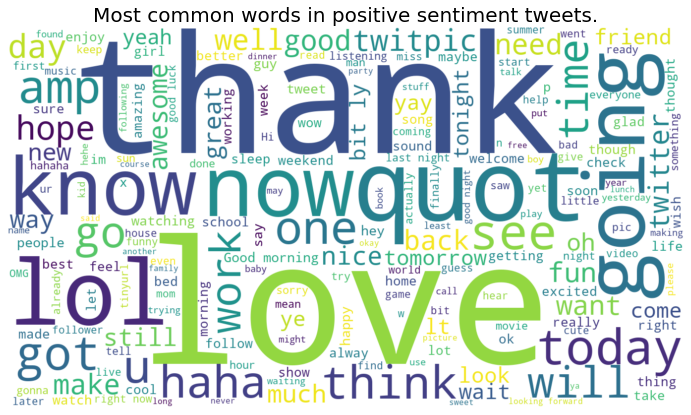

In [22]:
plt.figure(figsize=(14,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(data[data.target=='Positive'].content))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in positive sentiment tweets.',fontsize=20)
plt.show()

Based on the word cloud, it can be deduced that the most repeated words in tweets with positive sentiment are words such as: love, quot, lol, haha, thank, today.

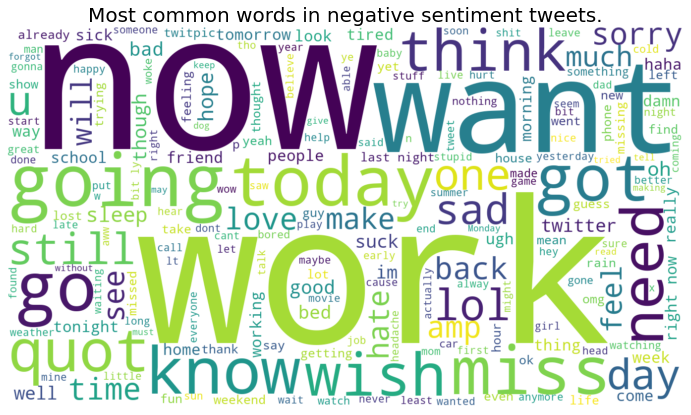

In [23]:
plt.figure(figsize=(14,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(data[data.target=='Negative'].content))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in negative sentiment tweets.',fontsize=20)
plt.show()

Based on the word cloud, it can be deduced that the most repeated words in tweets with negative sentiment are words such as: quot, lol, today which are the same as for positive sentiment class. However, there are also word occurrences from which negative sentiment of a tweet can be inferred such as: miss, sorry, hate etc.

# **Data preparing**
### **Dropping unnecessary columns**


There are a lot of unnecessary columns in the following dataset. The task is to classify the semantics of a tweet, so all columns except the target and content columns are unnecessary.

In [24]:
data.drop(['id','date','query','username','length'], axis=1, inplace=True)

In [25]:
data.head()

,target,content
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,Negative,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,Negative,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [41]:
df1.label = df1.label.replace({'positive': 1, 'negative': 0})

Replacing Positive and Negative labels with 1 and 0 respectively.

### **Content cleaning**

Stemming - it does refers to the process which goal is to reduce words into thier base form. In case of our problem for classification it is very important ooperation as we need to focus on the meaning of particular word. For instance words: *Running, Runned, Runner* all can reduce to the stem *Run*. Below we have used the base of english stopwords and stemming algorithm from nltk library.

In [16]:
from string import punctuation
print("DATA CLEANING -- \n")
# emojis defined
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

def replace_emojis(t):
  '''
  This function replaces happy unicode emojis with "happy" and sad unicode emojis with "sad.
  '''
  emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]

  emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                       "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                       "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                       "\U0001F631","\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                       "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

  words = t.split()
  reformed = []
  for w in words:
    if w in emoji_happy:
      reformed.append("happy")
    elif w in emoji_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t


def replace_smileys(t):
  '''
  This function replaces happy smileys with "happy" and sad smileys with "sad.
  '''
  emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

  emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  

  words = t.split()
  reformed = []
  for w in words:
    if w in emoticons_happy:
      reformed.append("happy")
    elif w in emoticons_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t

def replace_contractions(t):
  '''
  This function replaces english lanuage contractions like "shouldn't" with "should not"
  '''
  cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
  "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
  "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
   "i'm" : 'i am', "i've"	: "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
   "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
   "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
   "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
   "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
   "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
   "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}
  words = t.split()
  reformed = []
  for w in words:
    if w in cont:
      reformed.append(cont[w])
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t  

def remove_single_letter_words(t):
  '''
  This function removes words that are single characters
  '''
  words = t.split()
  reformed = []
  for w in words:
    if len(w) > 1:
      reformed.append(w)
  t = " ".join(reformed)
  return t  

print("Cleaning the tweets from the data.\n")
print("Replacing handwritten emojis with their feeling associated.")
print("Convert to lowercase.")
print("Replace contractions.")
print("Replace unicode emojis with their feeling associated.")
print("Remove all other unicoded emojis.")
print("Remove NON- ASCII characters.")
print("Remove numbers.")
print("Remove \"#\". ")
print("Remove \"@\". ")
print("Remove usernames.")
print("Remove \'RT\'. ")
print("Replace all URLs and Links with word \'URL\'.")
print("Remove all punctuations.")
print("Removes single letter words.\n")

def dataclean(t):
  '''
  This function cleans the tweets.
  '''
  t = replace_smileys(t) # replace handwritten emojis with their feeling associated
  t = t.lower() # convert to lowercase
  t = replace_contractions(t) # replace short forms used in english  with their actual words
  t = replace_emojis(t) # replace unicode emojis with their feeling associated
  t = emoji_pattern.sub(r'', t) # remove emojis other than smiley emojis
  t = re.sub('\\\\u[0-9A-Fa-f]{4}','', t) # remove NON- ASCII characters
  t = re.sub("[0-9]", "", t) # remove numbers # re.sub("\d+", "", t)
  t = re.sub('#', '', t) # remove '#'
  t = re.sub('@[A-Za-z0–9]+', '', t) # remove '@'
  t = re.sub('@[^\s]+', '', t) # remove usernames
  t = re.sub('RT[\s]+', '', t) # remove retweet 'RT'
  t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', t) # remove links (URLs/ links)
  t = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', t) # remove punctuations
  t = t.replace('\\\\', '')
  t = t.replace('\\', '')
  t = remove_single_letter_words(t) # removes single letter words
  
  return t

df1['cleaning'] = df1['Tweet'].apply(dataclean)
print("Tweets have been cleaned.")

DATA CLEANING -- 

Cleaning the tweets from the data.

Replacing handwritten emojis with their feeling associated.
Convert to lowercase.
Replace contractions.
Replace unicode emojis with their feeling associated.
Remove all other unicoded emojis.
Remove NON- ASCII characters.
Remove numbers.
Remove "#". 
Remove "@". 
Remove usernames.
Remove 'RT'. 
Replace all URLs and Links with word 'URL'.
Remove all punctuations.
Removes single letter words.

Tweets have been cleaned.


In [40]:
df1.head()

,Tweet,label,length,cleaning
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",negative,27,soal jln jatibarupolisi tdk bs gertak gubernur...
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",negative,35,sesama cew lho kayaknya harusnya bisa lebih ra...
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,positive,17,kepingin gudeg mbarek bu hj amad foto dari goo...
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",negative,32,jln jatibarubagian dari wilayah tn abangpengat...
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",positive,30,share pengalaman aja kemarin jam batalin tiket...


In [19]:
english_stopwords = stopwords.words('english')
#base of english stopwords
stemmer = SnowballStemmer('english')
#stemming algorithm
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
#regex for mentions and links in tweets

In [20]:
def preprocess(content, stem=False):
  content = re.sub(regex, ' ', str(content).lower()).strip()
  tokens = []
  for token in content.split():
    if token not in english_stopwords:
      tokens.append(stemmer.stem(token))
  return " ".join(tokens)

In [22]:
df1.cleaning = df1.cleaning.apply(lambda x: preprocess(x))

In [38]:
df1.head()

,Tweet,label,length,cleaning
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",negative,27,soal jln jatibarupolisi tdk bs gertak gubernur...
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",negative,35,sesama cew lho kayaknya harusnya bisa lebih ra...
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,positive,17,kepingin gudeg mbarek bu hj amad foto dari goo...
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",negative,32,jln jatibarubagian dari wilayah tn abangpengat...
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",positive,30,share pengalaman aja kemarin jam batalin tiket...


Head of data after stemming and removing https.

### **Train test split**
Due to the rather large size of the dataset 160000 tweets will be enough for testing.

In [42]:
train, test = train_test_split(df1, test_size=0.1, random_state=44)

In [43]:
print('Train dataset shape: {}'.format(train.shape))
print('Test dataset shape: {}'.format(test.shape))

Train dataset shape: (3960, 4)
Test dataset shape: (441, 4)


### **Tokenization**

It is a particular kind of document segmentation. It does breaks up text into smaller chunks or segments called tokens. A tokenizer breaks unstructured data, natural language text, into chunks of information that can be counted as discrete elements. After this operation these counts of token occurences in particular document can be used as a vector representing given document.

In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.cleaning)  
vocab_size = len(tokenizer.word_index) + 1 
max_length = 50

Based on the analysis of the tweet length it was concluded that the maximum length for tokenization equal to 50 will be sufficient

In [45]:
sequences_train = tokenizer.texts_to_sequences(train.cleaning) 
sequences_test = tokenizer.texts_to_sequences(test.cleaning) 

X_train = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_test = pad_sequences(sequences_test, maxlen=max_length, padding='post')

y_train = train.label.values
y_test = test.label.values

### **Word embeddings using GloVe**

Word embeddings provide a dense representation of words and their relative meanings. Embedding Matrix is a maxtrix of all words and their corresponding embeddings. Embedding matrix is used in embedding layer in model to embedded a token into it's vector representation, that contains information regarding that token or word.

Embedding vocabulary is taken from the tokenizer and the corresponding vectors from embedding model, which in this case is GloVe model. GloVe stand for Global Vectors for Word Representation 
and it is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

Below was used pretrained GloVe embeddings from world known Stanford vector files. The smallest available file contains embeddings created for tiny 6 billions of tokens.

In [46]:
import re
embeddings_dictionary = dict()
embedding_dim = 100
glove_file = open(r"C:\Users\rizky\Downloads\glove.6B.100d.txt")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
    
glove_file.close()

embeddings_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embeddings_matrix[index] = embedding_vector

# **Model test harness** 

The proposed model architecture will be tested on the following parameters:

*   **loss** = "binnary_crossentropy" (due to binary classification problem)
*   **optimizer** = Adam(learning_rate=0.001) (may be changed after seeing the learning graph)
*   **metrics** = "accuracy" (due to binary classification problem)
*   **number of epochs** = 10 (due to the large training data set)
*   **batch size** = 1000 (in order to accelerate learning time)

In [47]:
embedding_layer = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False)

In [58]:
num_epochs = 20
batch_size = 1000

# **Model - Embedding + Stacked LSTM**


Model consisted of layers build with lstm cells. With such a large amount of data, the model is computationally complex making the training process take a while. Furthermore, model regularization layers will reduce the possible overfitting which was present in the simpler models tested.

In [59]:
model = Sequential([
        embedding_layer,
        tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True)),
        tf.keras.layers.Dropout(0.4),
       # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Bidirectional(LSTM(128)),
        tf.keras.layers.Dropout(0.4),
       # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           1775500   
                                                                 
 bidirectional_4 (Bidirectio  (None, 50, 256)          234496    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 50, 256)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

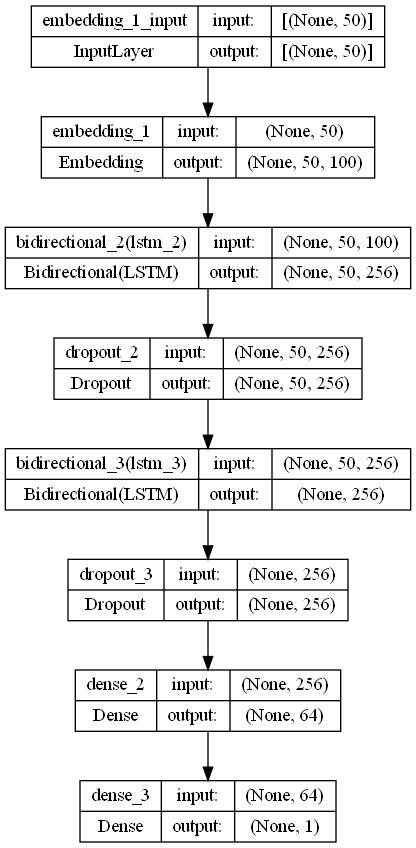

In [51]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [61]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, batch_size = batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)# , callbacks=[es])

Epoch 1/20
4/4 - 9s - loss: 0.6800 - accuracy: 0.5677 - val_loss: 0.6503 - val_accuracy: 0.6259 - 9s/epoch - 2s/step
Epoch 2/20
4/4 - 4s - loss: 0.6532 - accuracy: 0.6247 - val_loss: 0.6403 - val_accuracy: 0.6281 - 4s/epoch - 933ms/step
Epoch 3/20
4/4 - 4s - loss: 0.6335 - accuracy: 0.6457 - val_loss: 0.6167 - val_accuracy: 0.6553 - 4s/epoch - 957ms/step
Epoch 4/20
4/4 - 4s - loss: 0.6049 - accuracy: 0.6816 - val_loss: 0.6084 - val_accuracy: 0.6553 - 4s/epoch - 982ms/step
Epoch 5/20
4/4 - 4s - loss: 0.5903 - accuracy: 0.6909 - val_loss: 0.5751 - val_accuracy: 0.7029 - 4s/epoch - 1s/step
Epoch 6/20
4/4 - 4s - loss: 0.5622 - accuracy: 0.7152 - val_loss: 0.5532 - val_accuracy: 0.7211 - 4s/epoch - 1s/step
Epoch 7/20
4/4 - 4s - loss: 0.5457 - accuracy: 0.7321 - val_loss: 0.5528 - val_accuracy: 0.7188 - 4s/epoch - 1s/step
Epoch 8/20
4/4 - 4s - loss: 0.5406 - accuracy: 0.7338 - val_loss: 0.5449 - val_accuracy: 0.7211 - 4s/epoch - 1s/step
Epoch 9/20
4/4 - 4s - loss: 0.5220 - accuracy: 0.7465 -

In [62]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5, 1, 0)

14/14 [==============================] - 2s 43ms/step


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       276
           1       0.72      0.52      0.61       165

    accuracy                           0.75       441
   macro avg       0.74      0.70      0.71       441
weighted avg       0.74      0.75      0.74       441



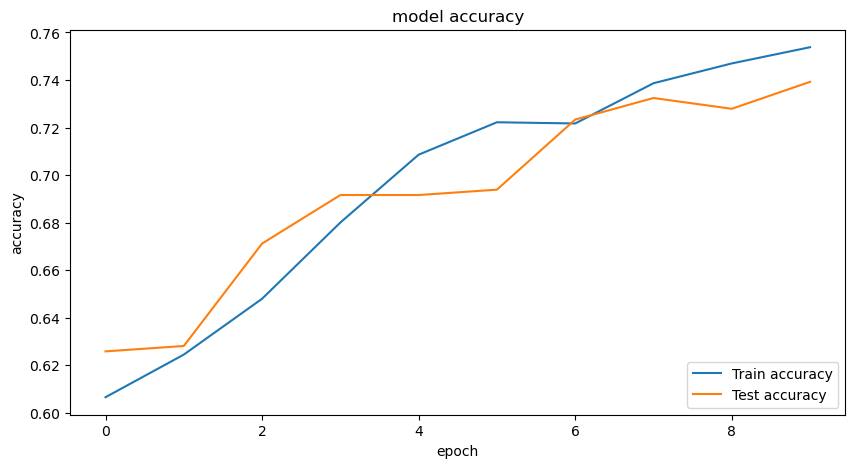

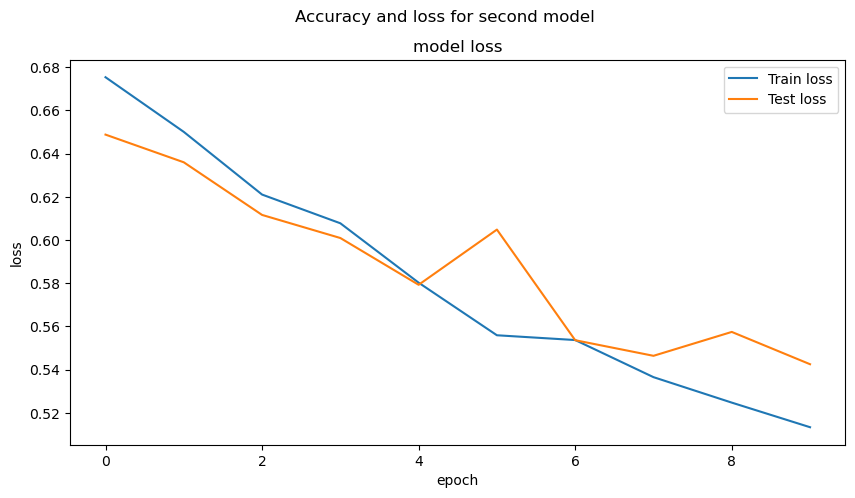

In [55]:
#History for accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='lower right')
plt.show()
# History for loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.suptitle('Accuracy and loss for second model')
plt.show()

In [57]:
vec = CountVectorizer()

xeval=["I hate when I have to call and wake people up "]
print(xeval)
xeval_numeric = vec.fit_transform(xeval).toarray() 
xeval_padded = pad_sequences(xeval_numeric, maxlen=max_length, padding='post')
prediction = model.predict(xeval_padded)
print(prediction)

['I hate when I have to call and wake people up ']
1/1 [==============================] - 0s 39ms/step
[[0.33023742]]


In [48]:
for i in range(10):
    print(X_test[i], y_pred[i])

[   22   992   264  6282   691    52 27684   303 94215    77    88   121
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0] [0]
[26174     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0] [1]
[1214 3161    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0] [0]
[ 1789   233  4829    78    30    31  1183   939   277 29102     0     0
     0     0     0     0     0     0     0     0